In [1]:
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from transformers import pipeline

from utils import config, utils

In [2]:
df, df_cv = utils.Utils.load_data()

c:\Uni\5. Semester\NLP\NLP-CrowdFlow\src\utils\utils.py:61: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir + config.TRAIN_SET)


In [3]:
pipe = pipeline("text-classification", model="ProsusAI/finbert")

In [ ]:
y_pred = []

for idx, row in tqdm.tqdm(df.iterrows(), desc="Predicting sentiment"):
    try:
        result = pipe(
            {"text": row["text"]},
            truncation=True  
        )
        y_pred.append(result)
    except Exception as e:
        print(idx, "|", e, "|", row["text"])
        y_pred.append({"label": "N/A"})
    
df["y_pred"] = y_pred

Predicting sentiment: 1888it [02:41, 11.68it/s]


In [9]:
df.head()

,id,created_at,text,label,y_pred
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,"{'label': 'neutral', 'score': 0.8652521967887878}"
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,"{'label': 'neutral', 'score': 0.5683484077453613}"
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,"{'label': 'positive', 'score': 0.9200612902641..."
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,"{'label': 'neutral', 'score': 0.9410194754600525}"
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,"{'label': 'positive', 'score': 0.5787540078163..."


In [ ]:
df["pred_sentiment"] = df["y_pred"].apply(lambda x: x["label"])
df["pred_sentiment"] = df["pred_sentiment"].replace({"POS": "positive", "NEU": "neutral", "NEG": "negative"})
df.head(35)

,id,created_at,text,label,y_pred,pred_sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,"{'label': 'neutral', 'score': 0.8652521967887878}",neutral
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,"{'label': 'neutral', 'score': 0.5683484077453613}",neutral
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,"{'label': 'positive', 'score': 0.9200612902641...",positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,"{'label': 'neutral', 'score': 0.9410194754600525}",neutral
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,"{'label': 'positive', 'score': 0.5787540078163...",positive
5,27027,2020-04-12 21:52:56+00:00,RT @QuantTrend: Reduce your portfolio RISK! GO...,positive,"{'label': 'positive', 'score': 0.8276929259300...",positive
6,472959,2020-06-09 05:23:06+00:00,$863.69 Million in Sales Expected for Spirit A...,positive,"{'label': 'neutral', 'score': 0.8231363296508789}",neutral
7,392845,2020-06-02 01:12:29+00:00,RT @ArjunKharpal: #Apple has cut the prices of...,negative,"{'label': 'negative', 'score': 0.9125142097473...",negative
8,313771,2020-05-07 04:58:41+00:00,RT @SMA_alpha: The #CDC U.S. New Case data has...,negative,"{'label': 'negative', 'score': 0.9474666118621...",negative
9,267894,2020-05-04 15:16:29+00:00,Where to Look for Dependable Dividends\nRead M...,neutral,"{'label': 'neutral', 'score': 0.919302225112915}",neutral


[[0.25189394 0.06628788 0.68181818]
 [0.06321839 0.41954023 0.51724138]
 [0.04481132 0.04009434 0.91509434]]


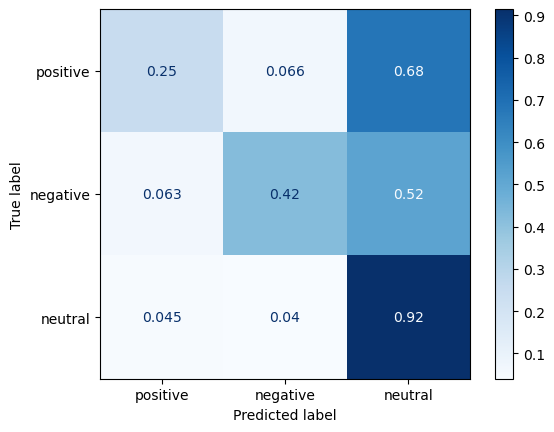

In [11]:
cm = confusion_matrix(df["label"], df["pred_sentiment"], labels=config.SENTIMENTS, normalize="true")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=config.SENTIMENTS)
disp.plot(cmap=plt.cm.Blues)

# FEIN BERT Active Learning

In [1]:
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from transformers import pipeline

from utils import config, utils

In [2]:
df_all, df_cv = utils.Utils.load_data()
# df_all = df_all.sample(n=5000, random_state=config.RANDOM_STATE)
df_all = df_all[:50000]
df_all.info()

c:\Uni\5. Semester\NLP\NLP-CrowdFlow\src\utils\utils.py:61: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir + config.TRAIN_SET)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          50000 non-null  float64
 1   created_at  50000 non-null  object 
 2   text        50000 non-null  object 
 3   label       50000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [3]:
pipe = pipeline("text-classification", model="ProsusAI/finbert")

In [4]:
y_pred = []

for idx, row in tqdm.tqdm(df_all.iterrows(), desc="Predicting sentiment"):
    try:
        result = pipe(
            {"text": row["text"]},
            truncation=True  
        )
        y_pred.append(result)
    except Exception as e:
        print(idx, "|", e, "|", row["text"])
        y_pred.append({"label": "N/A"})
    
df_all["y_pred"] = y_pred

Predicting sentiment: 50000it [1:12:37, 11.47it/s]


In [5]:
df_all["pred_sentiment"] = df_all["y_pred"].apply(lambda x: x["label"])
df_all["label"] = df_all["pred_sentiment"].replace({"POS": "positive", "NEU": "neutral", "NEG": "negative"})
df_all.tail()

,id,created_at,text,label,y_pred,pred_sentiment
49995,50766.0,2020-04-14 18:02:42+00:00,RT @realJosephRich: If you're buying based on ...,negative,"{'label': 'negative', 'score': 0.967018187046051}",negative
49996,50767.0,2020-04-14 18:02:41+00:00,RT @schaudenfraud: Watching the broader market...,neutral,"{'label': 'neutral', 'score': 0.6586867570877075}",neutral
49997,50768.0,2020-04-14 18:02:39+00:00,Who sent your jobs to China? That would be Bi...,neutral,"{'label': 'neutral', 'score': 0.8878596425056458}",neutral
49998,50769.0,2020-04-14 18:02:28+00:00,Some good looking charts $avav $klac $soxx $ih...,neutral,"{'label': 'neutral', 'score': 0.7154611349105835}",neutral
49999,50770.0,2020-04-14 18:02:23+00:00,RT @TicTocTick: 2850 is the new 3400!\n\nIf we...,neutral,"{'label': 'neutral', 'score': 0.9381551146507263}",neutral


In [6]:
df_all.to_csv(r"../res/prepared/ieee_AL_50.csv", index=False)

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from transformers import pipeline

from utils import config, utils

In [2]:
df_all, df_cv = utils.Utils.load_data()
df_all.tail()

,id,created_at,text,label,y_pred,pred_sentiment
49995,50766.0,2020-04-14 18:02:42+00:00,RT @realJosephRich: If you're buying based on ...,negative,"{'label': 'negative', 'score': 0.967018187046051}",negative
49996,50767.0,2020-04-14 18:02:41+00:00,RT @schaudenfraud: Watching the broader market...,neutral,"{'label': 'neutral', 'score': 0.6586867570877075}",neutral
49997,50768.0,2020-04-14 18:02:39+00:00,Who sent your jobs to China? That would be Bi...,neutral,"{'label': 'neutral', 'score': 0.8878596425056458}",neutral
49998,50769.0,2020-04-14 18:02:28+00:00,Some good looking charts $avav $klac $soxx $ih...,neutral,"{'label': 'neutral', 'score': 0.7154611349105835}",neutral
49999,50770.0,2020-04-14 18:02:23+00:00,RT @TicTocTick: 2850 is the new 3400!\n\nIf we...,neutral,"{'label': 'neutral', 'score': 0.9381551146507263}",neutral


In [3]:
df_cv.head()

,URL,text,Summary,label
0,https://www.moneycontrol.com/news/business/eco...,US consumer spending dropped by a record in Ap...,consumer spending plunges 13.6 percent in Apri...,negative
1,https://www.businesstoday.in/top-story/state-r...,State-run lenders require an urgent Rs 1.2 tri...,government will have to take a bulk of the tab...,negative
2,https://www.financialexpress.com/economy/covid...,Apparel exporters on Wednesday urged the gover...,exporters are facing issues in terms of raw ma...,negative
3,https://www.moneycontrol.com/news/business/mar...,Asian shares battled to extend a global reboun...,the dollar loses some ground on the safe haven...,negative
4,https://www.financialexpress.com/industry/six-...,After India’s sovereign credit rating fell to ...,six Indian public-sector undertakings have tak...,negative


In [4]:
nltk_svc_w2v_model_1 = utils.CustomPipeline(
    df_all,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_svc_w2v_1"
)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  29.3s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  26.2s
Classification Report for nltk_svc_w2v_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.66      0.95      0.78      1459
     neutral       0.98      0.83      0.90      7172
    positive       0.70      0.94      0.80      1369

    accuracy                           0.86     10000
   macro avg       0.78      0.91      0.83     10000
weighted avg       0.90      0.86      0.87     10000

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.44      0.84      0.58      8987
     neutral       0.52      0.10      0.16      8987
    positive       0.53      0.49      0.51      8987

    accuracy                           0.48     26961
   macro avg       0.50      0.48      0.42     26961
we

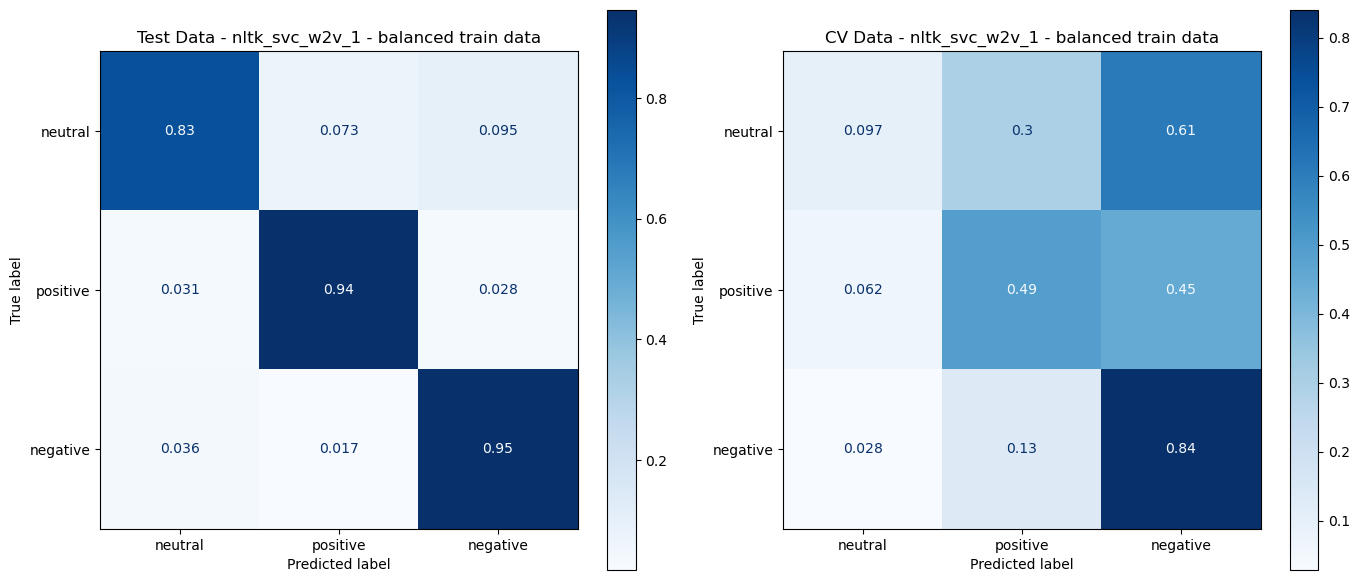

In [5]:
nltk_svc_w2v_model_1.fit(True)
nltk_svc_w2v_model_1.evaluate(True)

In [6]:
nltk_svc_w2v_model_2 = utils.CustomPipeline(
    df_all,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_svc_w2v_2"
)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  33.4s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  26.4s
Classification Report for nltk_svc_w2v_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.67      0.94      0.78      1459
     neutral       0.98      0.83      0.90      7172
    positive       0.68      0.95      0.79      1369

    accuracy                           0.86     10000
   macro avg       0.78      0.91      0.83     10000
weighted avg       0.90      0.86      0.87     10000

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.42      0.86      0.57      8987
     neutral       0.55      0.09      0.16      8987
    positive       0.56      0.45      0.50      8987

    accuracy                           0.47     26961
   macro avg       0.51      0.47      0.41     26961
we

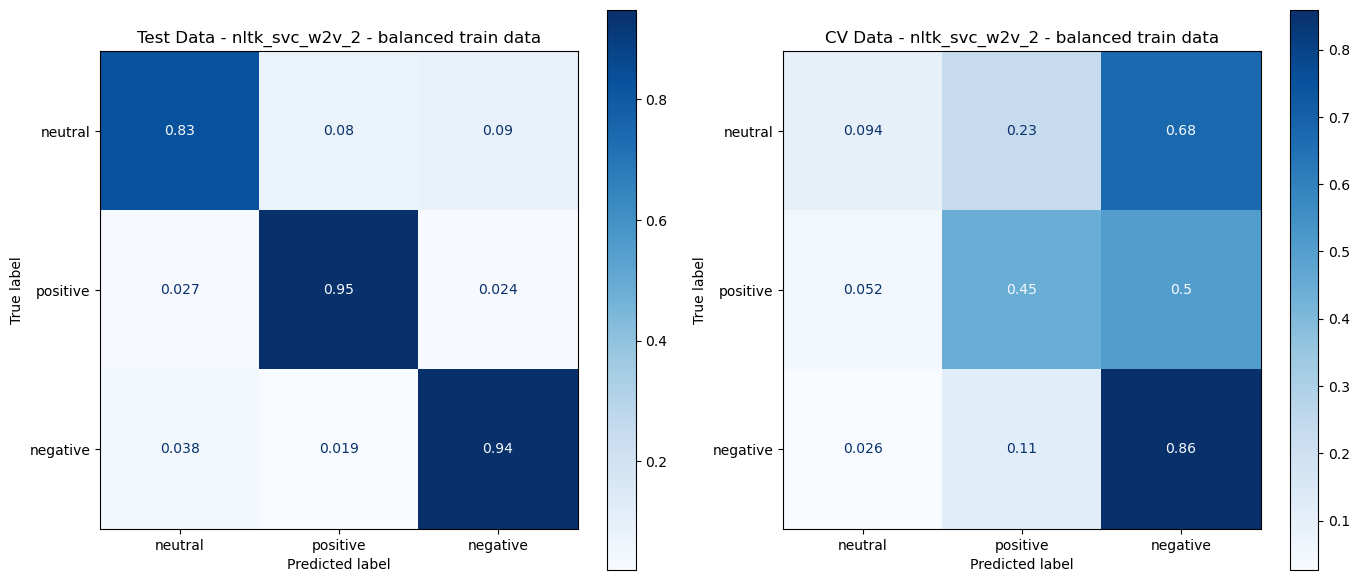

In [7]:
nltk_svc_w2v_model_2.fit(True)
nltk_svc_w2v_model_2.evaluate(True)

In [8]:
nltk_svc_w2v_model_3 = utils.CustomPipeline(
    df_all,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=True, remove_urls=True)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_svc_w2v_3"
)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total= 1.4min
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 1.2min
Classification Report for nltk_svc_w2v_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.55      0.82      0.66      1459
     neutral       0.95      0.76      0.85      7172
    positive       0.54      0.80      0.64      1369

    accuracy                           0.78     10000
   macro avg       0.68      0.80      0.72     10000
weighted avg       0.83      0.78      0.79     10000

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.51      0.84      0.63      8987
     neutral       0.51      0.20      0.29      8987
    positive       0.60      0.57      0.58      8987

    accuracy                           0.54     26961
   macro avg       0.54      0.54      0.50     26961
we

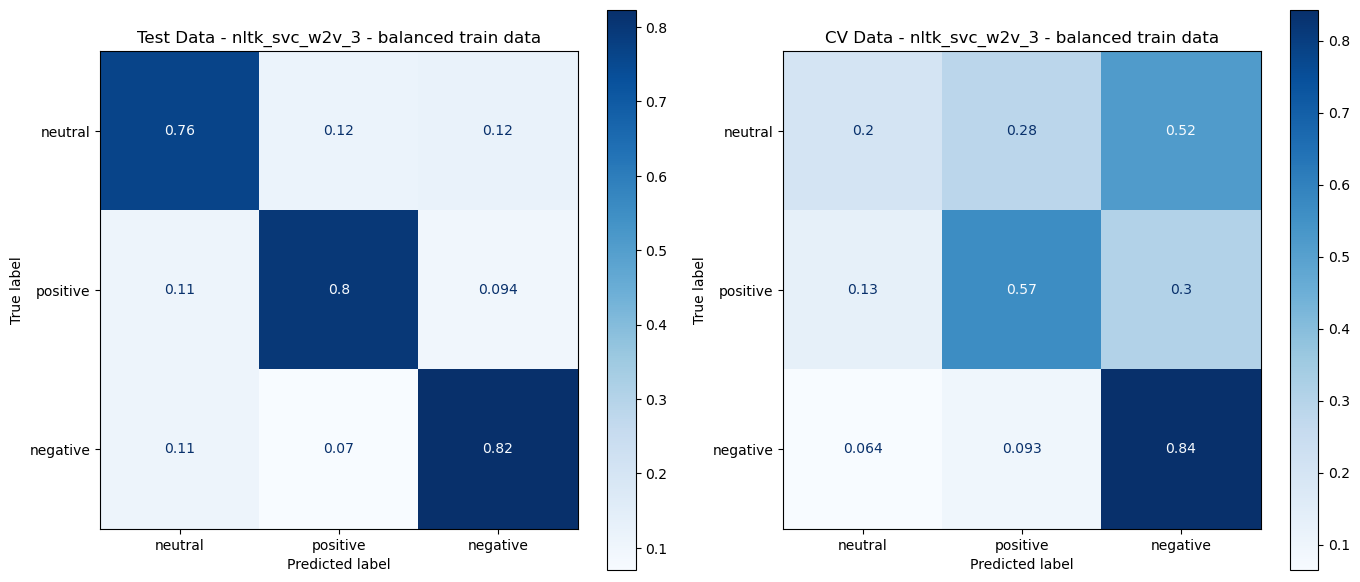

In [9]:
nltk_svc_w2v_model_3.fit(True)
nltk_svc_w2v_model_3.evaluate(True)